Functions Graph
===============

`FunctionsGraph` is one of the core classes of FiatLight: it represents a graph of functions,
where the output of one function can be linked to the input of another function.

* **Source**: see its full code [online](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/fiat_core/functions_graph.py)
* **API**: [FunctionsGraph API](api_functions_graph)

Creating a FunctionsGraph
=========================

When a FunctionsGraph can be created automatically
--------------------------------------------------

In simple cases (one function, or a list of functions that are chained together), you do not need to create a
FunctionsGraph. See the examples below.

*Single function*:

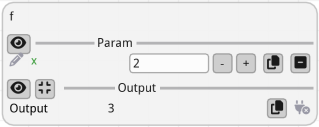

In [3]:
import fiatlight as fl
def f(x: int) -> int:
    return x + 1
fl.run(f, app_name="Single function")

*Chained functions*:

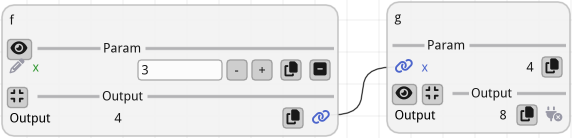

In [4]:
import fiatlight as fl
def f(x: int) -> int:
    return x + 1
def g(x: int) -> int:
    return x * 2
fl.run([f, g], app_name="Chained functions")

When you need to create a FunctionsGraph
----------------------------------------

For more complex cases, you can create a FunctionsGraph manually. This allows you to precisely control the links between
the functions.

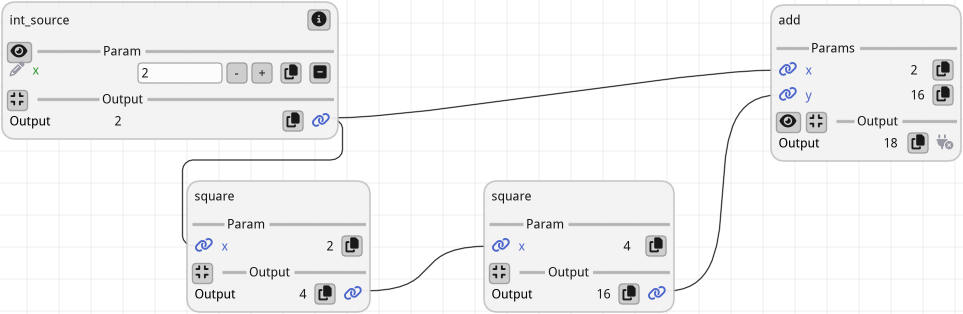

In [5]:
import fiatlight as fl

def int_source(x : int) -> int:
    """This function will be the entry point of the graph
    Since its inputs is unlinked, fiatlight will ask the user for a value for x
    """
    return x

def square(x: int) -> int:
    return x * x

def add(x: int, y: int) -> int:
    return x + y

# 1. Create the graph
#
#    Notes:
#      - in this example we add the function `square` *two times*!
#          Each of them will have a different *unique name*: "square_1" and "square_2"
#      - instead of creating a graph from a function composition, we could also create an empty graph
#        and add the functions manually, like show in the comment below:
#             graph = fl.FunctionsGraph.create_empty()
#             graph.add_function_composition([int_source, square, square])
#
graph = fl.FunctionsGraph.from_function_composition([int_source, square, square])


# 2. Manually add a function
graph.add_function(add)

# 3. And link it
# First, link the output of int_source to the "x" input of add
# Note: we could also specify the source output index: src_output_idx=0 (but this is the default)
graph.add_link("int_source", "add", dst_input_name="x")

# Then, link the output of the second `square` to the "y" input of add
graph.add_link("square_2", "add", dst_input_name="y")


# 4. Run the graph
fl.run(graph, app_name="Manual graph")